1058.6679612127436
-375.0450746208172
cherp


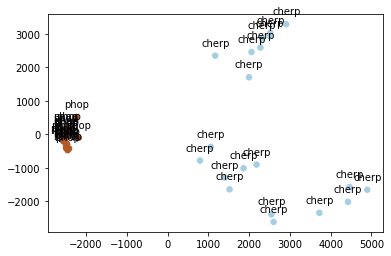

In [13]:
import cv2
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

name = input('input name: ')
index = pd.read_csv('../datasets/' + name + '-index.csv', sep=',')
label_text = index.values[:,1]

dataset = pd.read_csv('../datasets/prc_' + name + '.csv', sep=',')
ids = dataset.values[:,0]
filenames = dataset.values[:,1]
labels = dataset.values[:,2].astype('int')

images = []
for i in range(len(ids)):
    img = cv2.imread(filenames[i])
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    rsz_img = cv2.resize(gray, (64,64), interpolation=cv2.INTER_LINEAR)
    images.append(np.ravel(rsz_img))

pca = PCA(n_components=2)
features = pca.fit_transform(images)

plt.figure()
X_t = np.transpose(features)
print(X_t[0,1])
print(X_t[1,1])
print(label_text[labels[1]])

plt.scatter(X_t[0], X_t[1], c=labels, s=30, cmap=plt.cm.Paired)
for i in range(len(labels)):
    plt.annotate(label_text[labels[i]], (X_t[0,i], X_t[1,i]), textcoords='offset points', xytext=(0,10), ha='center')
plt.show()
